### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
### Keras and Tensorflow >2.0

In [2]:
### Data Collection
import pandas_datareader as pdr
key="API key tiingo"      

https://api.tiingo.com/documentation/general/overview

In [3]:
df = pdr.get_data_tiingo('TWTR', api_key=key)

C:\Anoconda\envs\stock\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [4]:
df.to_csv('TWTR.csv')

In [5]:
import pandas as pd

In [6]:
df=pd.read_csv('TWTR.csv')

In [7]:
df.head(100)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,TWTR,2017-05-22 00:00:00+00:00,18.43,18.52,18.27,18.35,11279284,18.43,18.52,18.27,18.35,11279284,0.0,1.0
1,TWTR,2017-05-23 00:00:00+00:00,18.15,18.51,17.98,18.41,16797183,18.15,18.51,17.98,18.41,16797183,0.0,1.0
2,TWTR,2017-05-24 00:00:00+00:00,17.98,18.34,17.83,18.10,15459917,17.98,18.34,17.83,18.10,15459917,0.0,1.0
3,TWTR,2017-05-25 00:00:00+00:00,17.95,18.27,17.94,18.04,9539766,17.95,18.27,17.94,18.04,9539766,0.0,1.0
4,TWTR,2017-05-26 00:00:00+00:00,18.23,18.30,17.95,17.99,10421985,18.23,18.30,17.95,17.99,10421985,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,TWTR,2017-10-05 00:00:00+00:00,18.25,18.29,17.74,17.80,21224398,18.25,18.29,17.74,17.80,21224398,0.0,1.0
96,TWTR,2017-10-06 00:00:00+00:00,17.85,18.13,17.66,18.03,16311895,17.85,18.13,17.66,18.03,16311895,0.0,1.0
97,TWTR,2017-10-09 00:00:00+00:00,17.67,18.05,17.65,17.82,8791038,17.67,18.05,17.65,17.82,8791038,0.0,1.0
98,TWTR,2017-10-10 00:00:00+00:00,17.41,17.93,17.39,17.77,10158369,17.41,17.93,17.39,17.77,10158369,0.0,1.0


In [8]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1254,TWTR,2022-05-13 00:00:00+00:00,40.72,42.0000,40.010,40.4000,101830362,40.72,42.0000,40.010,40.4000,101830362,0.0,1.0
1255,TWTR,2022-05-16 00:00:00+00:00,37.39,39.2899,37.320,39.1700,52310654,37.39,39.2899,37.320,39.1700,52310654,0.0,1.0
1256,TWTR,2022-05-17 00:00:00+00:00,38.32,38.8700,36.850,37.0000,44990281,38.32,38.8700,36.850,37.0000,44990281,0.0,1.0
1257,TWTR,2022-05-18 00:00:00+00:00,36.85,38.7200,36.575,37.4200,24010289,36.85,38.7200,36.575,37.4200,24010289,0.0,1.0
1258,TWTR,2022-05-19 00:00:00+00:00,37.29,38.5000,36.200,36.7602,32000301,37.29,38.5000,36.200,36.7602,32000301,0.0,1.0


In [9]:
df1=df.reset_index()['close']

In [10]:
df1

0       18.43
1       18.15
2       17.98
3       17.95
4       18.23
        ...  
1254    40.72
1255    37.39
1256    38.32
1257    36.85
1258    37.29
Name: close, Length: 1259, dtype: float64

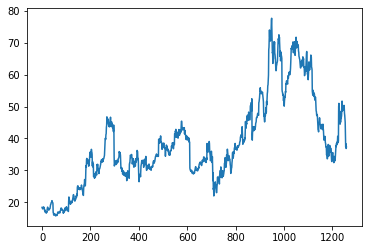

In [11]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [12]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [13]:
import numpy as np

In [14]:
df1

0       18.43
1       18.15
2       17.98
3       17.95
4       18.23
        ...  
1254    40.72
1255    37.39
1256    38.32
1257    36.85
1258    37.29
Name: close, Length: 1259, dtype: float64

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
df1

array([[0.04330963],
       [0.03878474],
       [0.03603749],
       ...,
       [0.3647382 ],
       [0.34098255],
       [0.34809308]])

In [17]:
df1.shape

(1259, 1)

In [18]:
print(df1)

[[0.04330963]
 [0.03878474]
 [0.03603749]
 ...
 [0.3647382 ]
 [0.34098255]
 [0.34809308]]


## Preprocessing

In [19]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.80)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [20]:
training_size,test_size

(1007, 252)

In [21]:
train_data

array([[0.04330963],
       [0.03878474],
       [0.03603749],
       ...,
       [0.60504202],
       [0.60067873],
       [0.62960569]])

In [22]:
test_data

array([[0.62540401],
       [0.66758242],
       [0.6666128 ],
       [0.68034906],
       [0.68406593],
       [0.68277311],
       [0.67372334],
       [0.66919845],
       [0.6667744 ],
       [0.69893342],
       [0.70911441],
       [0.69586296],
       [0.71040724],
       [0.71994182],
       [0.72317388],
       [0.72850679],
       [0.7188106 ],
       [0.71396251],
       [0.72656755],
       [0.72882999],
       [0.74676794],
       [0.7761797 ],
       [0.81997414],
       [0.84841629],
       [0.84324499],
       [0.8490627 ],
       [0.86053652],
       [0.85746606],
       [0.84615385],
       [0.86376858],
       [0.8800905 ],
       [0.85665805],
       [0.82546865],
       [0.86005171],
       [0.87443439],
       [0.87023271],
       [0.88106012],
       [0.84550743],
       [0.81868132],
       [0.8123788 ],
       [0.84340659],
       [0.86926309],
       [0.8697479 ],
       [0.90400776],
       [0.85552683],
       [0.84970911],
       [0.87605042],
       [0.882

In [23]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [24]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [25]:
print(X_train.shape), print(y_train.shape)

(906, 100)
(906,)


(None, None)

In [26]:
print(X_test.shape), print(ytest.shape)

(151, 100)
(151,)


(None, None)

In [27]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [56]:
pip install tensorflow

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Anoconda\lib\site-packages\pip\_internal\cli\base_command.py", line 167, in exc_logging_wrapper
    status = run_func(*args)
  File "C:\Anoconda\lib\site-packages\pip\_internal\cli\req_command.py", line 205, in wrapper
    return func(self, options, args)
  File "C:\Anoconda\lib\site-packages\pip\_internal\commands\install.py", line 339, in run
    requirement_set = resolver.resolve(
  File "C:\Anoconda\lib\site-packages\pip\_internal\resolution\resolvelib\resolver.py", line 94, in resolve
    result = self._result = resolver.resolve(
  File "C:\Anoconda\lib\site-packages\pip\_vendor\resolvelib\resolvers.py", line 481, in resolve
    state = resolution.resolve(requirements, max_rounds=max_rounds)
  File "C:\Anoconda\lib\site-packages\pip\_vendor\resolvelib\resolvers.py", line 348, in resolve
    self._add_to_criteria(self.state.criteria, r, parent=None)
  File "C:\Anoconda\lib\site-packages\pip\_vendor\resolvelib\resolvers

     -------------------------------------  444.0/444.0 MB 4.6 MB/s eta 0:00:01


In [28]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

ModuleNotFoundError: No module named 'tensorflow'

In [55]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


NameError: name 'Sequential' is not defined

In [430]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_8 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_9 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [306]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_5 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_6 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [431]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 6s 487ms/step - loss: 0.0206 - val_loss: 0.0505
Epoch 2/100
12/12 [==============================] - 4s 309ms/step - loss: 0.0035 - val_loss: 0.0046
Epoch 3/100
12/12 [==============================] - 4s 300ms/step - loss: 0.0014 - val_loss: 0.0040
Epoch 4/100
12/12 [==============================] - 3s 287ms/step - loss: 8.1361e-04 - val_loss: 0.0073
Epoch 5/100
12/12 [==============================] - 3s 290ms/step - loss: 6.6860e-04 - val_loss: 0.0062
Epoch 6/100
12/12 [==============================] - 3s 255ms/step - loss: 6.4653e-04 - val_loss: 0.0062
Epoch 7/100
12/12 [==============================] - 3s 291ms/step - loss: 6.6186e-04 - val_loss: 0.0062
Epoch 8/100
12/12 [==============================] - 4s 300ms/step - loss: 6.2498e-04 - val_loss: 0.0049
Epoch 9/100
12/12 [==============================] - 4s 297ms/step - loss: 6.2745e-04 - val_loss: 0.0042
Epoch 10/100
12/12 [==============================] - 4s 303ms/step

In [37]:
import tensorflow as tf

In [39]:
tf.__version__

'2.1.0'

In [432]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [433]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [434]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

140.9909210035748

In [435]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

235.7193088627771

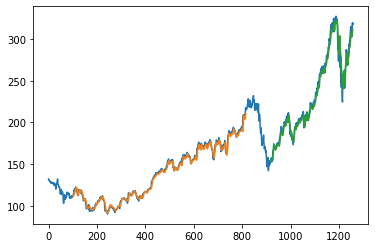

In [436]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [437]:
len(test_data)

441

In [438]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 100)

In [439]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [440]:
temp_input

[0.8583551465000423,
 0.8866418981676942,
 0.8743139407244789,
 0.8843198513890065,
 0.8783669678290975,
 0.8986321033521913,
 0.925821160179009,
 0.9287764924427933,
 0.9567677108840666,
 0.9386979650426415,
 0.933040614709111,
 0.9495060373216249,
 0.9642404796082076,
 0.9551211686228154,
 0.9598919192772104,
 0.9663514312251966,
 0.9624672802499368,
 0.9229502659799038,
 0.9598497002448705,
 0.9879253567508233,
 0.985941062230854,
 0.9253145317909315,
 0.9217259140420504,
 0.964747107996285,
 0.9757240564046274,
 0.9915984125643842,
 0.9697289538123788,
 0.9761462467280253,
 0.9679557544541082,
 1.0000000000000002,
 0.9901629654648318,
 0.9905007177235499,
 0.9653803934813816,
 0.9848855864223593,
 0.9708688676855528,
 0.9402600692392133,
 0.8774803681499621,
 0.8348391454867856,
 0.8541332432660644,
 0.7733682344000676,
 0.7726927298826314,
 0.8801401671873683,
 0.8400743054969182,
 0.8967322468969012,
 0.8552731571392387,
 0.8388499535590646,
 0.7423372456303303,
 0.82327113062568

In [441]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.94413203]
101
1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.

10 day output [[0.9050924]]
11 day input [0.94950604 0.96424048 0.95512117 0.95989192 0.96635143 0.96246728
 0.92295027 0.9598497  0.98792536 0.98594106 0.92531453 0.92172591
 0.96474711 0.97572406 0.99159841 0.96972895 0.97614625 0.96795575
 1.         0.99016297 0.99050072 0.96538039 0.98488559 0.97086887
 0.94026007 0.87748037 0.83483915 0.85413324 0.77336823 0.77269273
 0.88014017 0.84007431 0.89673225 0.85527316 0.83884995 0.74233725
 0.82327113 0.78143207 0.6665963  0.7921557  0.64118044 0.68614371
 0.66001013 0.65203074 0.58642236 0.56586169 0.66089673 0.65515494
 0.70970193 0.66452757 0.69437642 0.69218104 0.63569197 0.65266402
 0.63780292 0.7267162  0.71388162 0.74191506 0.75002111 0.77222832
 0.83049059 0.8194292  0.8289707  0.8125475  0.78776492 0.75162543
 0.78426074 0.77974331 0.81326522 0.8141096  0.79473106 0.83336148
 0.85898843 0.83901883 0.85628641 0.87486279 0.88782403 0.90095415
 0.92793211 0.948535   0.93333615 0.91746179 0.92544119 0.91771511
 0.9483239  0.9406400

20 day output [[0.90279734]]
21 day input [0.92531453 0.92172591 0.96474711 0.97572406 0.99159841 0.96972895
 0.97614625 0.96795575 1.         0.99016297 0.99050072 0.96538039
 0.98488559 0.97086887 0.94026007 0.87748037 0.83483915 0.85413324
 0.77336823 0.77269273 0.88014017 0.84007431 0.89673225 0.85527316
 0.83884995 0.74233725 0.82327113 0.78143207 0.6665963  0.7921557
 0.64118044 0.68614371 0.66001013 0.65203074 0.58642236 0.56586169
 0.66089673 0.65515494 0.70970193 0.66452757 0.69437642 0.69218104
 0.63569197 0.65266402 0.63780292 0.7267162  0.71388162 0.74191506
 0.75002111 0.77222832 0.83049059 0.8194292  0.8289707  0.8125475
 0.78776492 0.75162543 0.78426074 0.77974331 0.81326522 0.8141096
 0.79473106 0.83336148 0.85898843 0.83901883 0.85628641 0.87486279
 0.88782403 0.90095415 0.92793211 0.948535   0.93333615 0.91746179
 0.92544119 0.91771511 0.9483239  0.94064004 0.96635143 0.9563033
 0.96491598 0.94413203 0.93795931 0.92865342 0.91987926 0.91280973
 0.90777564 0.90473258 0

28 day output [[0.903272]]
29 day input [1.         0.99016297 0.99050072 0.96538039 0.98488559 0.97086887
 0.94026007 0.87748037 0.83483915 0.85413324 0.77336823 0.77269273
 0.88014017 0.84007431 0.89673225 0.85527316 0.83884995 0.74233725
 0.82327113 0.78143207 0.6665963  0.7921557  0.64118044 0.68614371
 0.66001013 0.65203074 0.58642236 0.56586169 0.66089673 0.65515494
 0.70970193 0.66452757 0.69437642 0.69218104 0.63569197 0.65266402
 0.63780292 0.7267162  0.71388162 0.74191506 0.75002111 0.77222832
 0.83049059 0.8194292  0.8289707  0.8125475  0.78776492 0.75162543
 0.78426074 0.77974331 0.81326522 0.8141096  0.79473106 0.83336148
 0.85898843 0.83901883 0.85628641 0.87486279 0.88782403 0.90095415
 0.92793211 0.948535   0.93333615 0.91746179 0.92544119 0.91771511
 0.9483239  0.94064004 0.96635143 0.9563033  0.96491598 0.94413203
 0.93795931 0.92865342 0.91987926 0.91280973 0.90777564 0.90473258
 0.90339231 0.90332204 0.90403908 0.90509242 0.90611798 0.90686554
 0.90720606 0.90711629

In [442]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [443]:
import matplotlib.pyplot as plt

In [391]:
len(df1)

1258

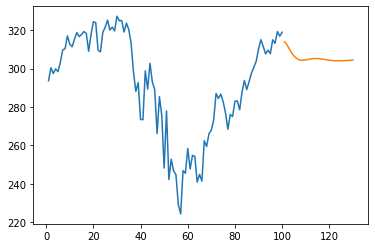

In [444]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

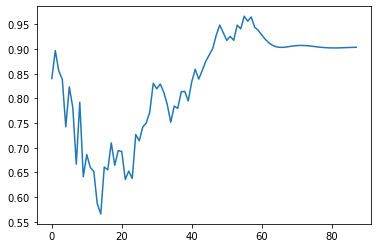

In [446]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [395]:
df3=scaler.inverse_transform(df3).tolist()

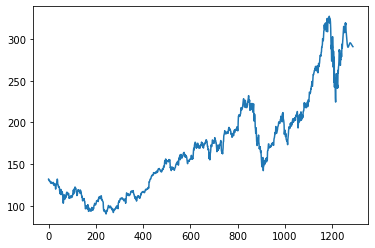

In [396]:
plt.plot(df3)